In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()


In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:

single_image= xtrain[4]


In [7]:
single_image.shape

(28, 28)

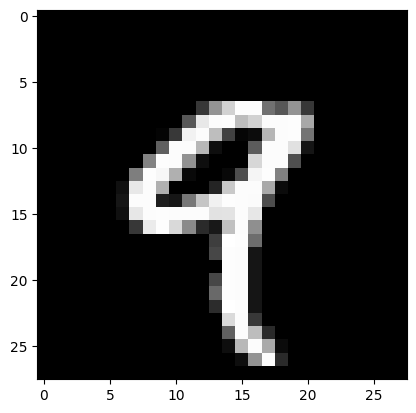

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:

ytrain.shape
     

(60000,)

In [10]:
xtrain.min()


0

In [11]:
xtrain.max()

255

In [12]:
xtrain_scaled = xtrain/255.0
xtest_scaled = xtest/255.0

In [13]:
xtrain_scaled.min()


0.0

In [14]:
xtrain_scaled.max()


1.0

In [15]:
ytrain[4]


9

In [16]:


ytrain_onehot = utils.to_categorical(ytrain,10)
ytest_onehot = utils.to_categorical(ytest,10)


In [17]:
type(ytrain_onehot)


numpy.ndarray

In [18]:
ytrain_onehot.shape


(60000, 10)

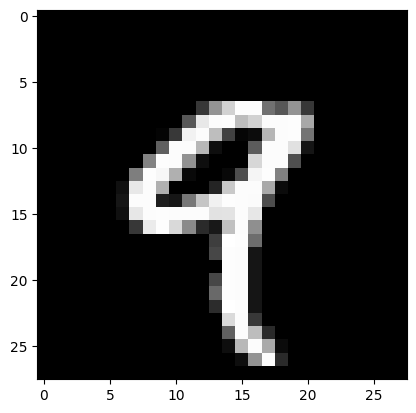

In [19]:
single_image = xtrain[4]
plt.imshow(single_image,cmap='gray')

In [20]:
ytrain_onehot[4]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [21]:
xtrain_scaled = xtrain_scaled.reshape(-1,28,28,1)
xtest_scaled = xtest_scaled.reshape(-1,28,28,1)

In [22]:
model= keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 16)                86544     
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                        

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [25]:
model.fit(xtrain_scaled ,ytrain_onehot, 
          epochs=8,batch_size=128, 
          validation_data=(xtest_scaled,ytest_onehot))

Epoch 1/8
469/469 [==============================] - 28s 56ms/step - loss: 0.4194 - accuracy: 0.8698 - val_loss: 0.1574 - val_accuracy: 0.9530
Epoch 2/8
469/469 [==============================] - 24s 52ms/step - loss: 0.1308 - accuracy: 0.9610 - val_loss: 0.1112 - val_accuracy: 0.9667
Epoch 3/8
469/469 [==============================] - 24s 51ms/step - loss: 0.0841 - accuracy: 0.9748 - val_loss: 0.0929 - val_accuracy: 0.9699
Epoch 4/8
469/469 [==============================] - 24s 51ms/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.0613 - val_accuracy: 0.9805
Epoch 5/8
469/469 [==============================] - 25s 53ms/step - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0587 - val_accuracy: 0.9808
Epoch 6/8
469/469 [==============================] - 23s 49ms/step - loss: 0.0454 - accuracy: 0.9855 - val_loss: 0.0552 - val_accuracy: 0.9823
Epoch 7/8
469/469 [==============================] - 23s 48ms/step - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.0651 - val_accuracy: 0.9794

In [26]:
metrics = pd.DataFrame(model.history.history)
metrics.head()
     

,loss,accuracy,val_loss,val_accuracy
0,0.419424,0.869750,0.157413,0.9530
1,0.130771,0.961000,0.111236,0.9667
2,0.084065,0.974817,0.092870,0.9699
3,0.065384,0.980150,0.061284,0.9805
4,0.053538,0.983400,0.058739,0.9808


<Axes: >

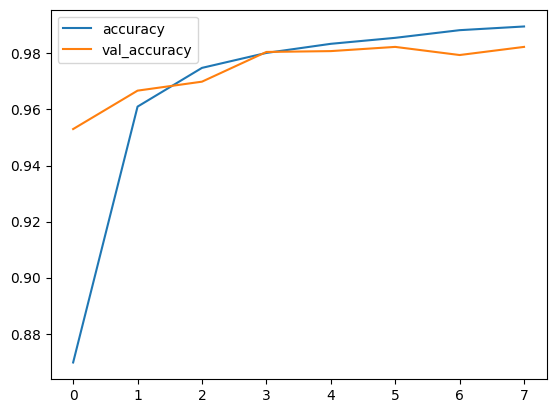

In [27]:
metrics[['accuracy','val_accuracy']].plot()


<Axes: >

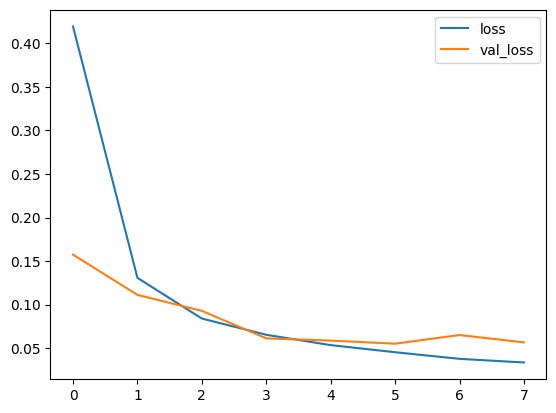

In [28]:
metrics[['loss','val_loss']].plot()


In [30]:
xtest_predictions = np.argmax(model.predict(xtest_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [31]:
print(confusion_matrix(ytest,xtest_predictions))


[[ 972    0    0    0    0    2    2    2    2    0]
 [   0 1131    1    1    0    0    1    1    0    0]
 [   2    5 1003    2    3    0    2    9    3    3]
 [   0    0    4  971    0   25    0    4    4    2]
 [   0    1    0    0  963    0    1    3    2   12]
 [   1    1    0    1    0  887    2    0    0    0]
 [   5    2    0    1    2    6  941    0    1    0]
 [   0    3    2    0    0    0    0 1021    1    1]
 [   5    1    2    1    1    2    1    1  955    5]
 [   0    1    0    0    7   11    0    7    4  979]]


In [32]:
print(classification_report(ytest,xtest_predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.96      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.95      0.99      0.97       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [33]:
img = image.load_img('nine.png')
type(img)
img = image.load_img('nine.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [34]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)


1/1 [==============================] - 0s 21ms/step


In [35]:
print(x_single_prediction)

[9]


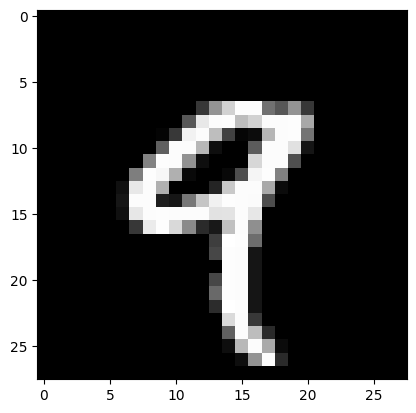

In [36]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


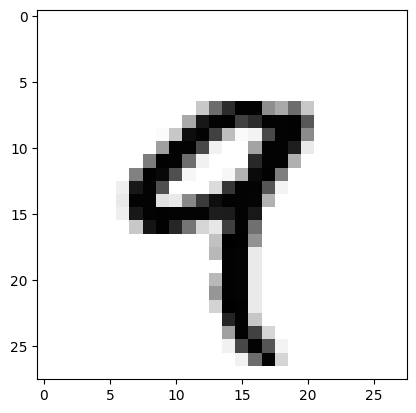

In [37]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')

In [38]:
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)), axis=1)


1/1 [==============================] - 0s 35ms/step


In [39]:
print(x_single_prediction)


[9]
